## Importar librerias a utilizar

In [2]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# MODELOS
import sklearn as skt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV # para regresion lineal multiple y regularizacion
from sklearn.linear_model import SGDRegressor # para gradientes
from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.preprocessing import LabelEncoder#variables categoricas
from sklearn.model_selection import train_test_split
!pip install optuna
import optuna
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#Almacenar Modelo
!pip install streamlit
import streamlit as st
import joblib


# Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold

# split y pipeline para entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Metricas de los modelos
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Escalado de datos
from sklearn.preprocessing import RobustScaler # pruebas
from sklearn.preprocessing import StandardScaler # usado

# Balance de modelos
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#shap
!pip install shap
import shap




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.7 MB/s eta 0:00:00


## Lectura del dataset y primer analisis

In [3]:
df = pd.read_csv("/content/weatherAUS.csv", delimiter=",")

In [ ]:
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [4]:
#-----------# Filtrado #-----------#

localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

# Filtrado del dataset por localidad SydneyAirport
df_filtrado = df[df['Location'].isin(localidades)]

# Eliminar la columna 'Unnamed: 0'
df_filtrado = df_filtrado.drop('Unnamed: 0', axis=1)
df_filtrado = df_filtrado.drop('Date',axis=1) #eliminamos la fecha para evitar data leakage
df_filtrado = df_filtrado.drop('Location',axis=1) #eliminamos la locacion porque no suma

df_filtrado.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
30167     19.5     22.4      15.6          6.2       0.0         NaN   
30168     19.5     25.6       6.0          3.4       2.7         NaN   
30169     21.6     24.5       6.6          2.4       0.1         NaN   
30170     20.2     22.8      18.8          2.2       0.0         NaN   
30171     19.7     25.7      77.4          NaN       0.0         NaN   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
30167            NaN          S        SSW          17.0  ...         84.0   
30168            NaN          W          E           9.0  ...         73.0   
30169            NaN        ESE        ESE          17.0  ...         86.0   
30170            NaN        NNE          E          22.0  ...         90.0   
30171            NaN        NNE          W          11.0  ...         74.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30167       1017.6       1017.4       8.0       8.0     20.7     20.9   
30168       1017.9       1016.4       7.0       7.0     22.4     24.8   
30169       1016.7       1015.6       7.0       8.0     23.5     23.0   
30170       1014.2       1011.8       8.0       8.0     21.4     20.9   
30171       1008.3       1004.8       8.0       8.0     22.5     25.5   

       RainToday  RainTomorrow RainfallTomorrow  
30167        Yes           Yes              6.0  
30168        Yes           Yes              6.6  
30169        Yes           Yes             18.8  
30170        Yes           Yes             77.4  
30171        Yes           Yes              1.6  

[5 rows x 22 columns]

Objetivo

Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

Dataset

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.


## Tratamiento de datos faltantes

In [ ]:
# Verificar cantidad de datos que faltan por columnas
df_filtrado.isna().sum()

MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [5]:
#------------# Aplicacion de medidas para datos faltantes #------------#

# Eliminar filas vacias del dataframe RainTomorrow y RainfallTomorrow
df_filtrado = df_filtrado.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

"""
Explicacion:
RainTomorrow y RainfallTomorrow son variables que queremos predecir por eso al tener datos
faltantes no podemos inventarnos valores o repetirlos, debemos eliminar esas filas ya que no
hay forma de rellenarlos.
"""

df_filtrado.isna().sum()

MinTemp               10
MaxTemp                6
Rainfall             163
Evaporation         1694
Sunshine            1939
WindGustDir         1445
WindGustSpeed       1443
WindDir9am           678
WindDir3pm           289
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           88
Humidity3pm           45
Pressure9am          253
Pressure3pm          245
Cloud9am            2041
Cloud3pm            2282
Temp9am               24
Temp3pm               16
RainToday            163
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [6]:
# Aplicar codificación de etiqueta para pasar datos de categorico a numerico
df_categorica=df_filtrado.copy()
# Guarda las columnas categóricas y numericas
columnas_categoricas = df_filtrado.select_dtypes(exclude='number').columns
columnas_numericas = df_filtrado.select_dtypes(include='number').columns

le = LabelEncoder()
for categorica in columnas_categoricas:
 df_categorica[categorica] = le.fit_transform(df_categorica[categorica])

df_categorica.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
30167     19.5     22.4      15.6          6.2       0.0           16   
30168     19.5     25.6       6.0          3.4       2.7           16   
30169     21.6     24.5       6.6          2.4       0.1           16   
30170     20.2     22.8      18.8          2.2       0.0           16   
30171     19.7     25.7      77.4          NaN       0.0           16   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
30167            NaN           8          11          17.0  ...         84.0   
30168            NaN          13           0           9.0  ...         73.0   
30169            NaN           2           2          17.0  ...         86.0   
30170            NaN           5           0          22.0  ...         90.0   
30171            NaN           5          13          11.0  ...         74.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30167       1017.6       1017.4       8.0       8.0     20.7     20.9   
30168       1017.9       1016.4       7.0       7.0     22.4     24.8   
30169       1016.7       1015.6       7.0       8.0     23.5     23.0   
30170       1014.2       1011.8       8.0       8.0     21.4     20.9   
30171       1008.3       1004.8       8.0       8.0     22.5     25.5   

       RainToday  RainTomorrow  RainfallTomorrow  
30167          1             1               6.0  
30168          1             1               6.6  
30169          1             1              18.8  
30170          1             1              77.4  
30171          1             1               1.6  

[5 rows x 22 columns]

In [7]:
#------------# Estandarizacion de datos #------------#

# Copia del dataset
regresion = df_categorica.copy()

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Filtrar el DataFrame con las columnas seleccionadas
df_regresion = regresion.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)

#------------# Datos regresion #------------#

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    regresion['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Ajustar el scaler a los datos y transformarlos
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)




#------------# Datos clasificacion #------------#

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(
    df_regresion,
    regresion['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Ajustar el scaler a los datos y transformarlos
X_train_C = scaler.fit_transform(X_train_C)
X_test_C = scaler.transform(X_test_C)
#generamos el train_test antes de rellenar datos y luego escalamos para que la media no la tenga en cuenta los datos del test

In [8]:
# Crear funcion para rellenar datos segun corresponda
def rellenar(dataframe):

    for columna in dataframe.columns:

        # Verifica si la columna tiene datos faltantes
        if dataframe[columna].isnull().any():

            # Si es numérica y continua, rellena con el promedio
            if pd.api.types.is_numeric_dtype(dataframe[columna]) and not pd.api.types.is_integer_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mean(), inplace=True)

            # Si es numérica y discreta, rellena con la moda
            elif pd.api.types.is_numeric_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

           # Si es categórica, rellena con la moda
            else:
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

    return dataframe

In [9]:
# Rellena datos
df1 = rellenar(df_filtrado)#analisis
df_categorica=rellenar(df_categorica)
# Reiniciar index
df1 =  df1.reset_index(drop = True)
df_categorica =  df_categorica.reset_index(drop = True)
df1.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

## Analisis descriptivo

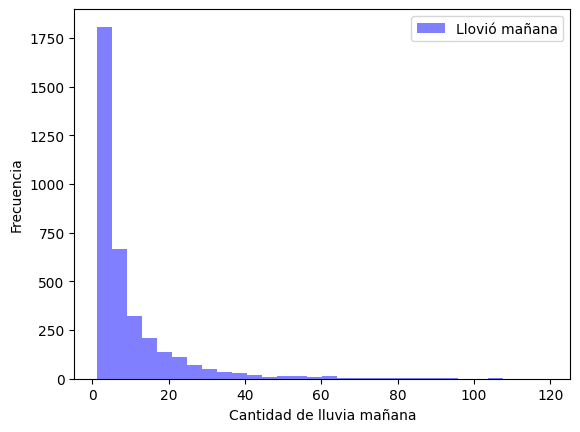

In [189]:
# Crear un histograma para la columna 'RainTomorrow'
plt.hist(df1[df1['RainTomorrow'] == 'Yes']['RainfallTomorrow'], bins=30, alpha=0.5, label='Llovió mañana', color='blue')

# Añadir etiquetas y leyenda
plt.xlabel('Cantidad de lluvia mañana')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

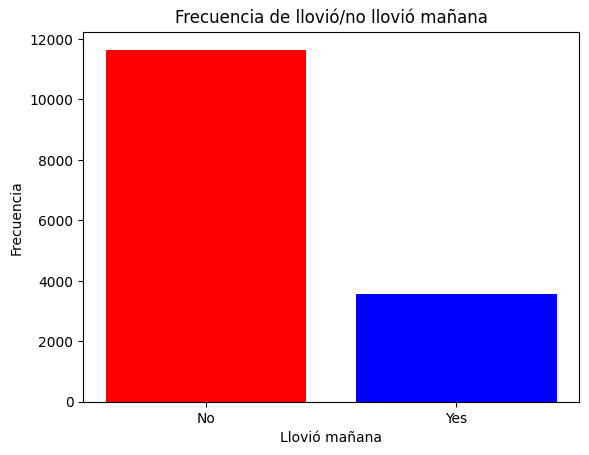

In [190]:
# Contar la frecuencia de 'RainTomorrow'
conteo_lluvia = df1['RainTomorrow'].value_counts()

# Crear un gráfico de barras
plt.bar(conteo_lluvia.index, conteo_lluvia, color=['red', 'blue'])

# Añadir etiquetas y título
plt.xlabel('Llovió mañana')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de llovió/no llovió mañana')

# Mostrar el gráfico de barras
plt.show()

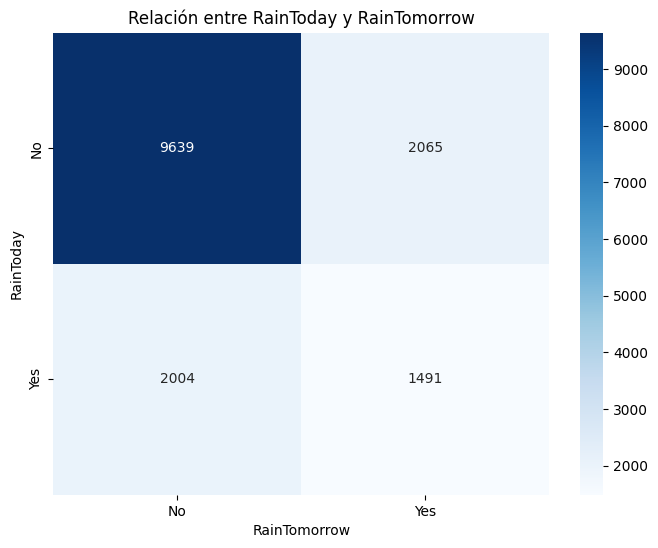

In [191]:
# Ver influencia de RainToday en RainTomorrow
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df1['RainToday'], df1['RainTomorrow'])

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la tabla de contingencia
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

# Ajustes de diseño
plt.title('Relación entre RainToday y RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('RainToday')

plt.show()

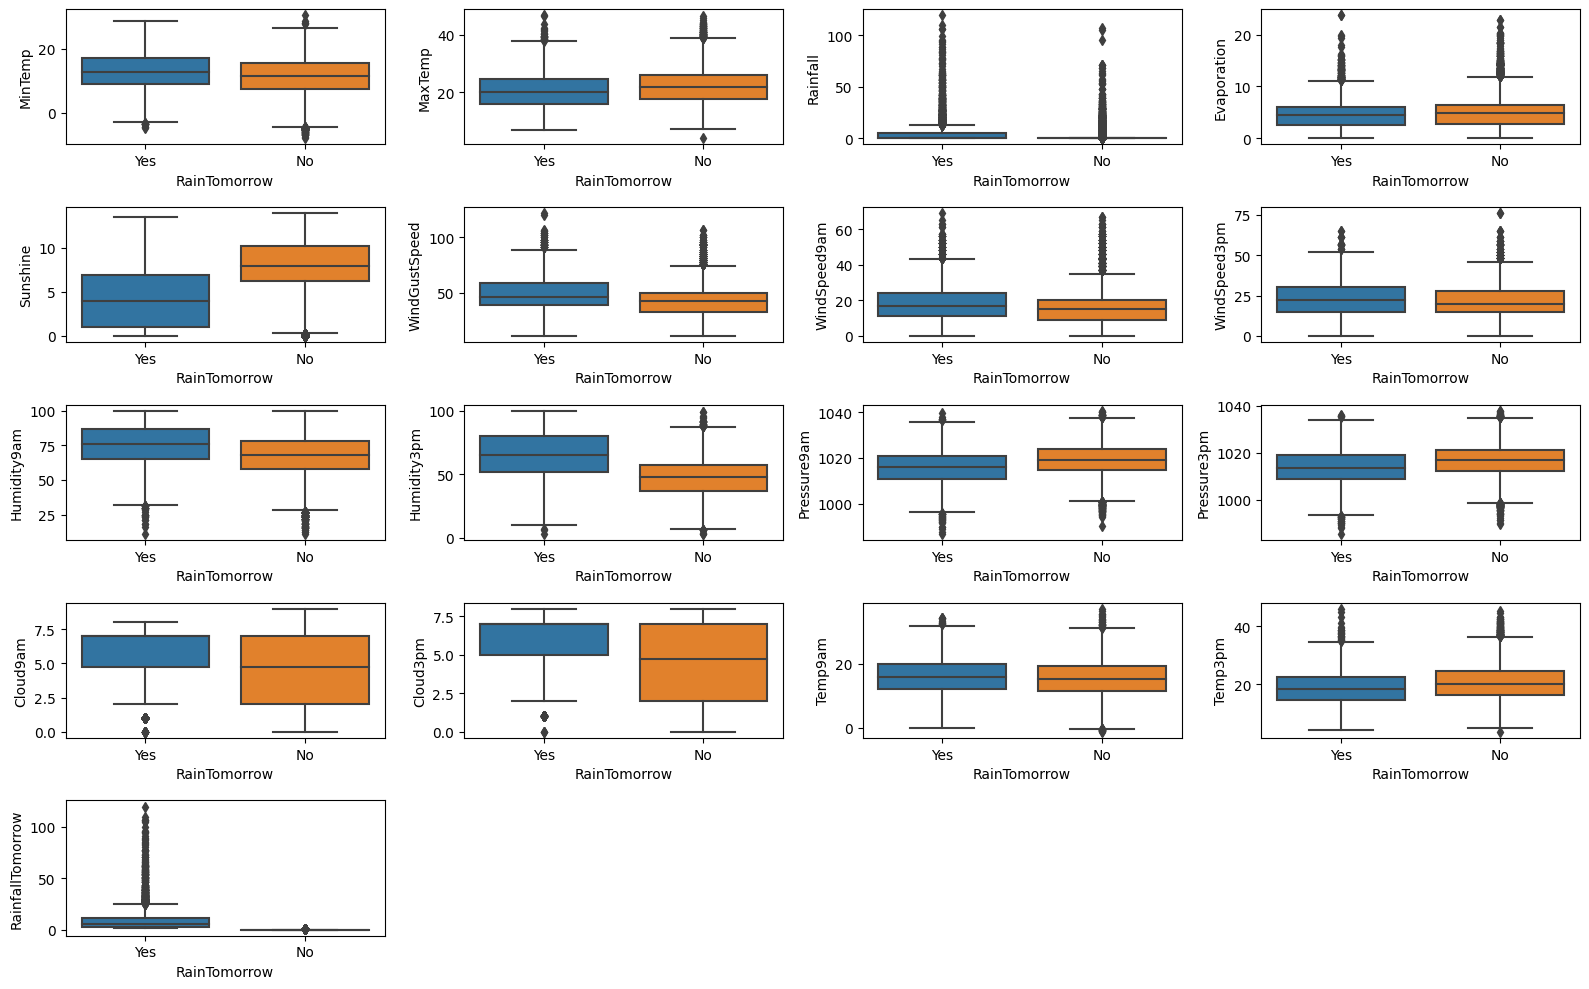

In [ ]:
#Gráfico de Boxplot
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de cajas para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='RainTomorrow', y=column, data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

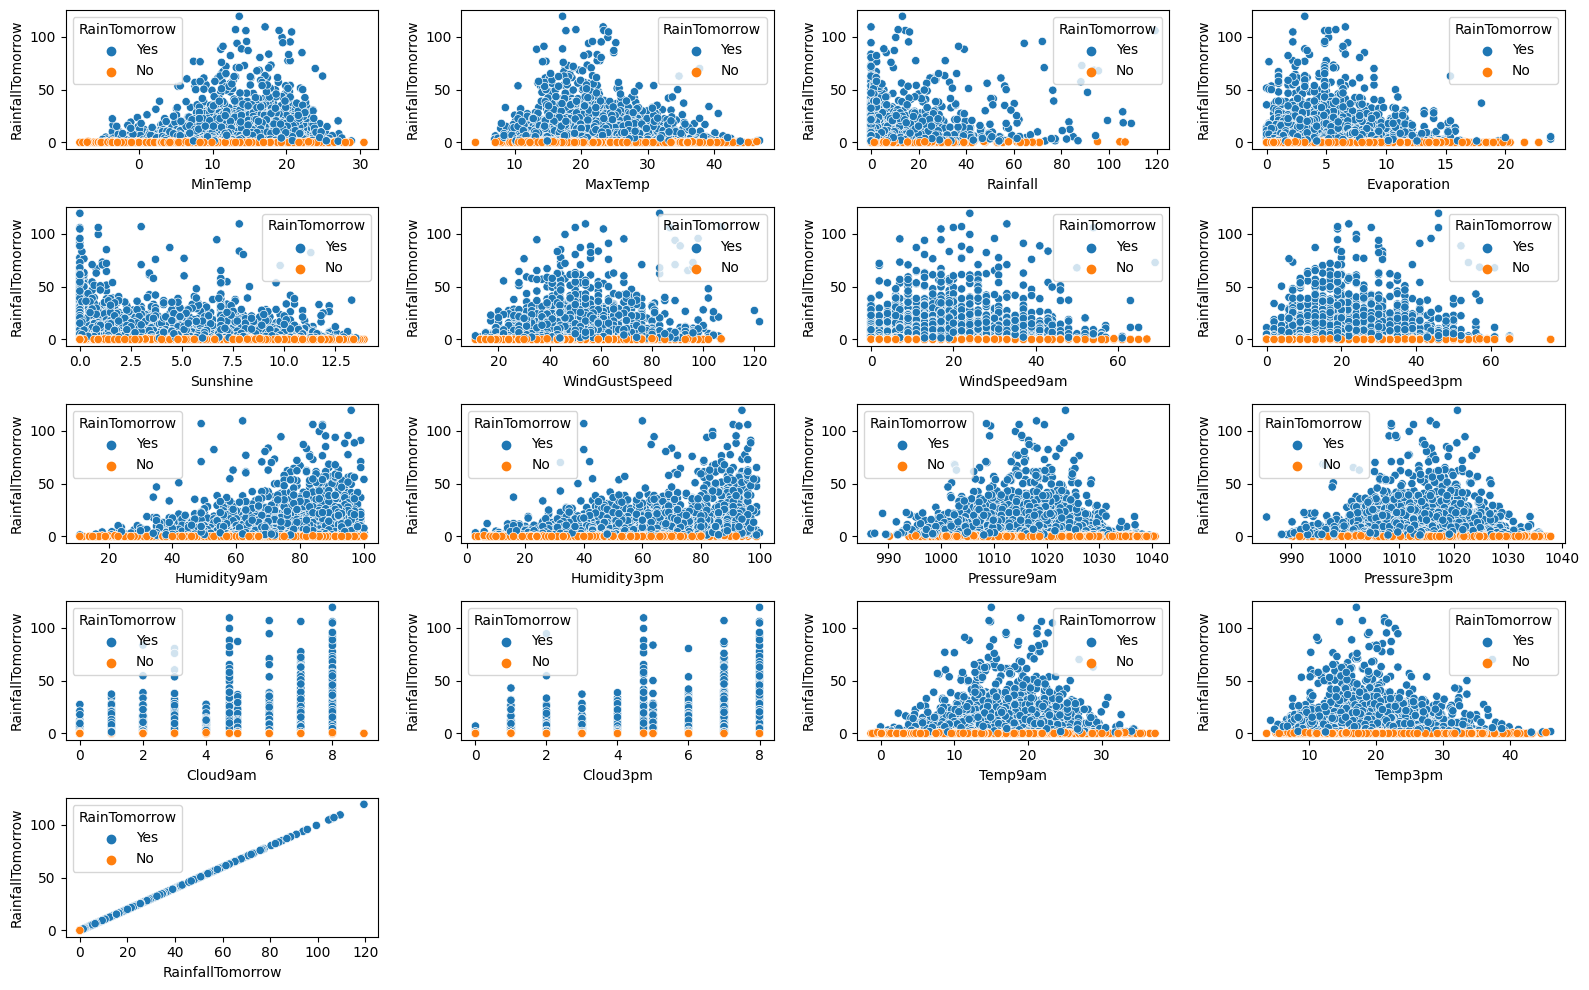

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de disperción para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=column,y='RainfallTomorrow',hue='RainTomorrow', data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

##Matriz de correlación

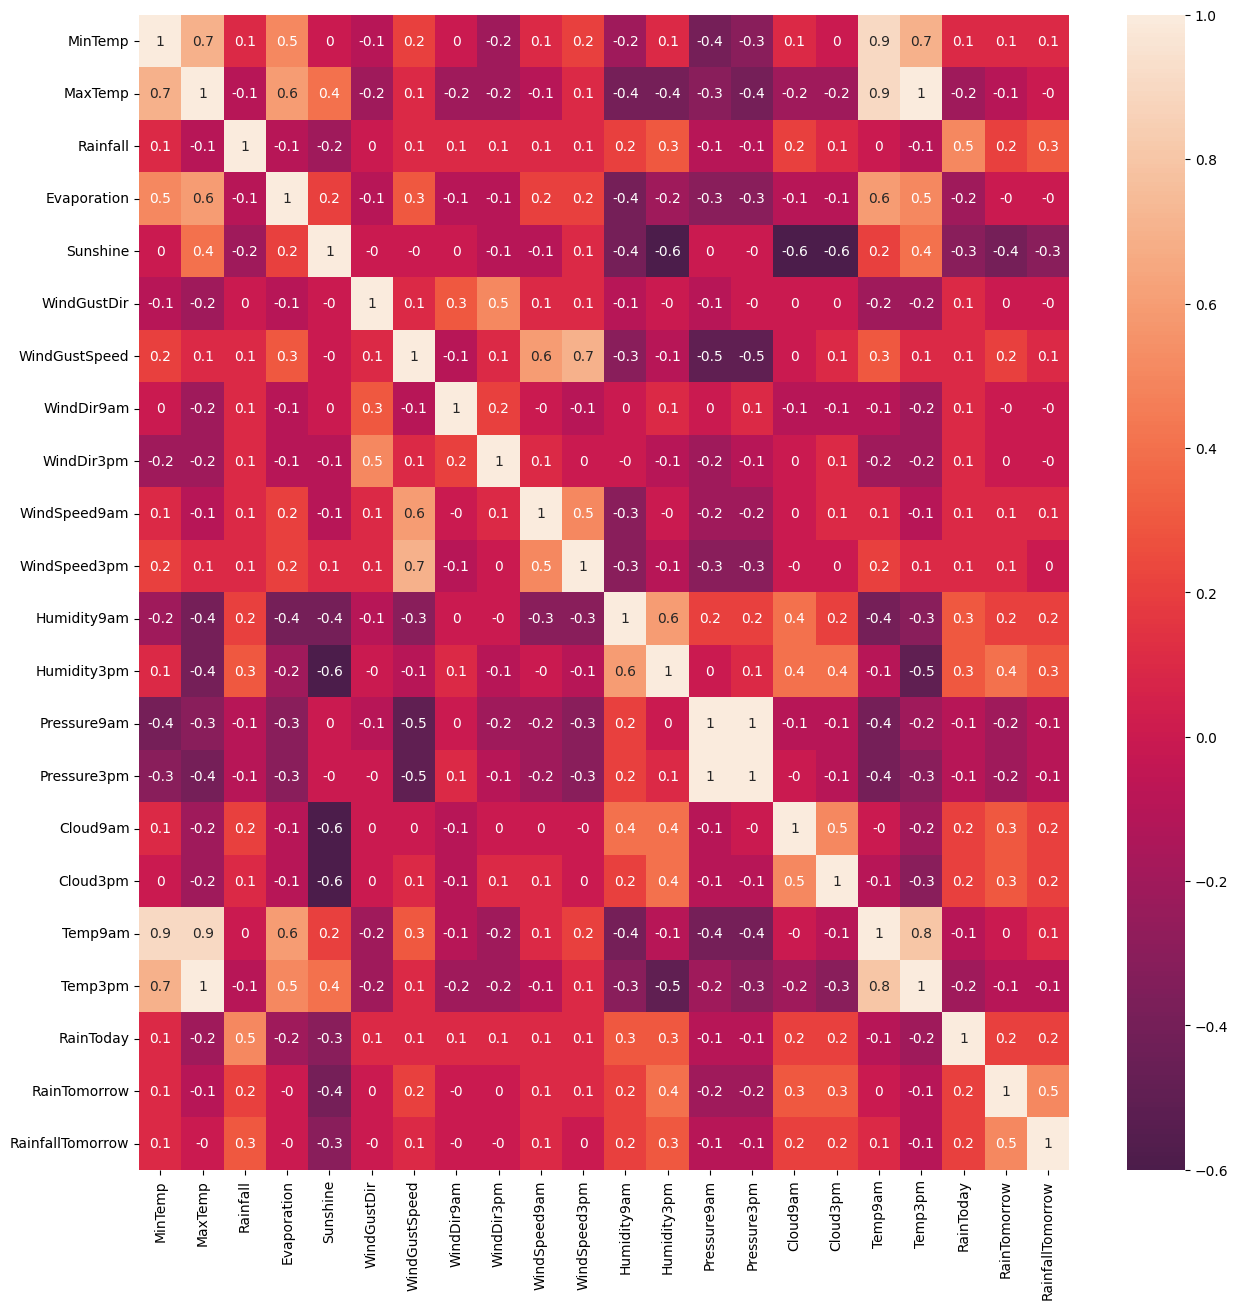

In [192]:
corr = df_categorica.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

# Implementar la solución del problema de regresión con regresión lineal múltiple

## LinearRegression

In [193]:
#------------# Estandarizacion de datos #------------#

# Crear un objeto StandardScaler
scaler = StandardScaler()
# Ajustar el scaler a los datos y transformarlos
df_regresion = pd.DataFrame(scaler.fit_transform(df_categorica), columns=df_categorica.columns)

Error cuadrático medio en entrenamiento: 40.882791420013014
Error cuadrático medio en predicciones: 48.78116395095341
Error absoluto medio en predicciones: 3.189219945225647
Intercept: [2.28762234]
Coeficientes: [[-0.57440674  0.59559295  1.12501892  0.17675378 -1.09248852 -0.08847214
   1.54120786  0.15373494  0.26711524 -0.10244801 -0.68770951 -0.22887388
   2.66119465  2.03967214 -2.14008722 -0.3118357   0.1379565  -0.05144968
   0.69886802  0.1620535 ]]
R2: 0.24110259259460842


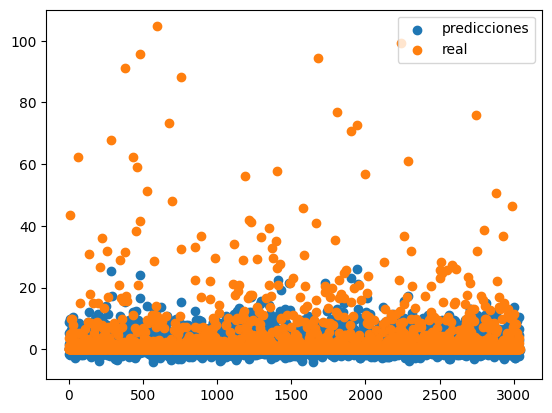

In [194]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()
plt.show()


###Explicabilidad

In [197]:
index=1
model.predict(X_test)[index]
shap_values[index]
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)
explanation

.values =
array([[-0.02304622,  0.02031472, -0.00343282, ...,  0.0109678 ,
         0.04456674, -0.01107061],
       [-0.0494528 , -0.00500066, -0.00410783, ..., -0.00066807,
         0.0033577 , -0.02116571],
       [ 0.02023716,  0.00748134, -0.00389081, ...,  0.00135196,
         0.02032594, -0.00990331],
       ...,
       [-0.03464026,  0.00130912,  0.00152966, ..., -0.02155653,
         0.01132283, -0.01002885],
       [ 0.00195188,  0.0018014 , -0.00326241, ...,  0.00437338,
         0.00595222,  0.02479317],
       [ 0.00441338, -0.0003447 , -0.00138319, ...,  0.0120914 ,
         0.00044345, -0.01659673]])

.base_values =
3.0028879546518685

####Local

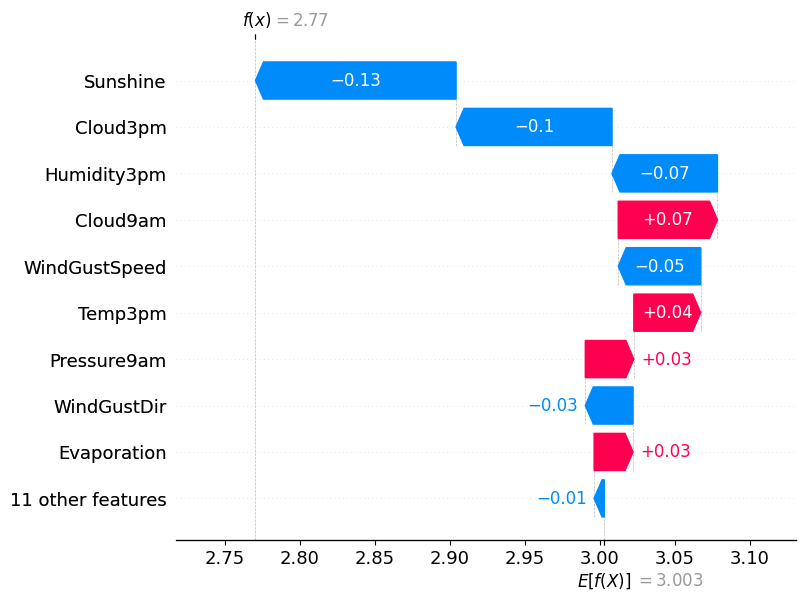

In [200]:
shap.plots.waterfall(explanation[0])

####Gobal

In [201]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)

TypeError: ignored

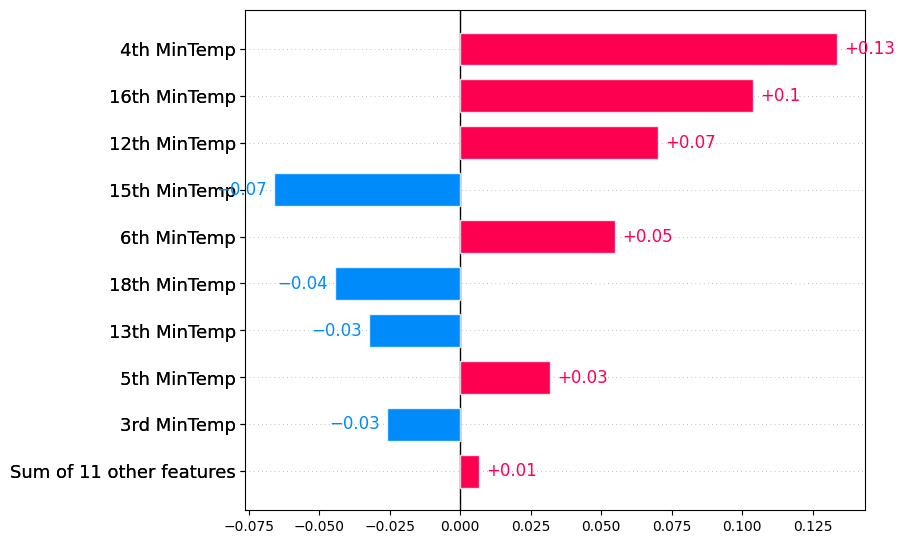

In [208]:
shap.plots.bar(explanation[0, 0])

In [204]:
shap.plots.beeswarm(explanation)

ValueError: ignored

# metodos de gradiente

##Gradiente estocaico

Error cuadrático medio en entrenamiento: 41.654097396635535
Error cuadrático medio en predicciones: 49.91914881040853
Error absoluto medio en predicciones: 3.083473240339081
Intercept: [2.23259999]
Coeficientes: [-6.85444054e-01  6.66202508e-01  1.03604820e+00  2.13534303e-03
 -8.25865382e-01 -6.55288206e-02  1.70173119e+00 -1.50451220e-01
  3.59483979e-01 -1.58402723e-01 -5.37458320e-01 -2.95456402e-01
  2.43506559e+00  2.17543143e+00 -1.92790620e+00 -3.60003181e-01
  8.62376875e-02 -7.91049187e-02  8.51488201e-01 -1.02922674e-02]
R2: 0.22339875591749692


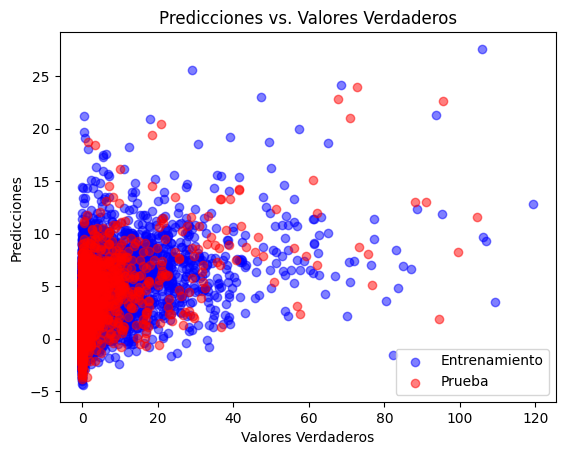

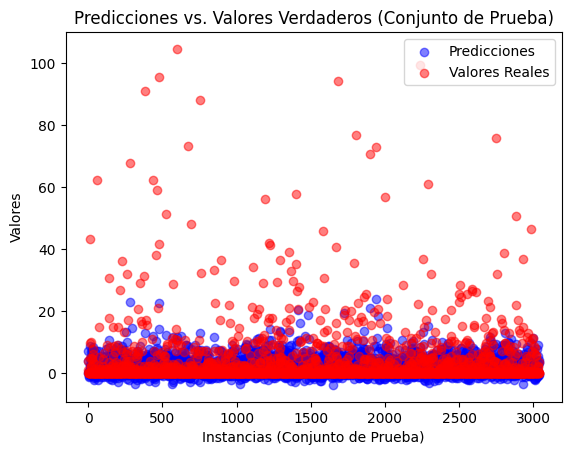

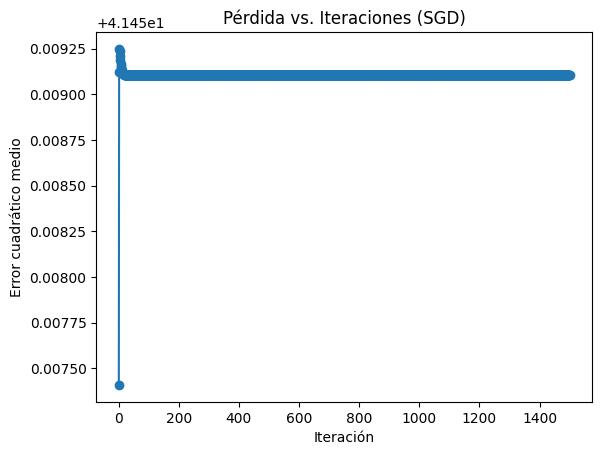

In [213]:
# metodo de gradiente estocaico por SGDRegressor
"""
Este modelo de regresion lineal ya implementa de forma interna el gradiente estocaico
"""

# Crear y entrenar el modelo de regresión lineal con SGD
#model = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42)
model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42)
#model = SGDRegressor(learning_rate='adaptive',  max_iter=2500, random_state=42)
model.fit(X_train, Y_train)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

# Metrica para comparar
mse_gradiente_estocaico = mean_squared_error(Y_test, predictions_test)

# Visualizar predicciones vs. valores reales con colores diferentes
plt.scatter(Y_train, predictions_train, label='Entrenamiento', color='blue', alpha=0.5)
plt.scatter(Y_test, predictions_test, label='Prueba', color='red', alpha=0.5)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Verdaderos')
plt.legend()
plt.show()


x_test = range(len(Y_test))

plt.scatter(x_test, predictions_test, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# R2: 0.24192420458092878 learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42
# R2: 0.24204824065946517 learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42
# R2: 0.2411484031847133 learning_rate='adaptive',  max_iter=2500, random_state=42

# Listas para almacenar errores de entrenamiento
train_errors = []

# Entrenamiento del modelo y cálculo de errores
for i in range(model.max_iter):
    model.partial_fit(X_train, Y_train.ravel())  # Entrenamiento parcial
    train_predictions = model.predict(X_train)
    train_errors.append(metrics.mean_squared_error(Y_train, train_predictions))

# Visualizar pérdida vs. iteraciones
plt.plot(range(1, model.max_iter + 1), train_errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Error cuadrático medio')
plt.title('Pérdida vs. Iteraciones (SGD)')
plt.show()

##Gradiente mini batch

In [215]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    # Métricas de evaluación
    y_train_pred = np.matmul(X_train, W)
    y_test_pred = np.matmul(X_test, W)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f'R2 Score (entrenamiento): {r2_train}')
    print(f'R2 Score (prueba): {r2_test}')
    print(f'MSE (entrenamiento): {mse_train}')
    print(f'MSE (prueba): {mse_test}')
    print(f'RMSE (entrenamiento): {rmse_train}')
    print(f'RMSE (prueba): {rmse_test}')
    print(f'MAE (entrenamiento): {mae_train}')
    print(f'MAE (prueba): {mae_test}')

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

# Utilizar el método con tus datos
mini_batch_gradient_descent(X_train, Y_train, X_test, Y_test, lr=0.01, epochs=200, batch_size= 200)

# Metrica para comparar
mse_gradiente_mini = 48.660835311015504

ValueError: ignored

# Regularización

## Ridge Regression


In [216]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, Y_train)




# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.309536475054645
MSE: 0.12102230628721856
RMSE: 0.3478826041744809
MAE: 0.26644300505127744
MAPE: inf


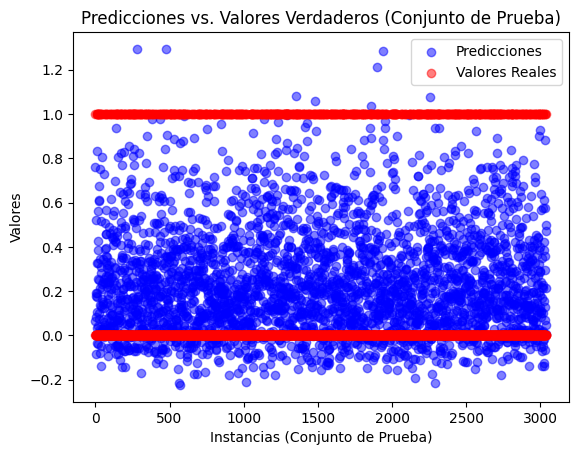

In [217]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

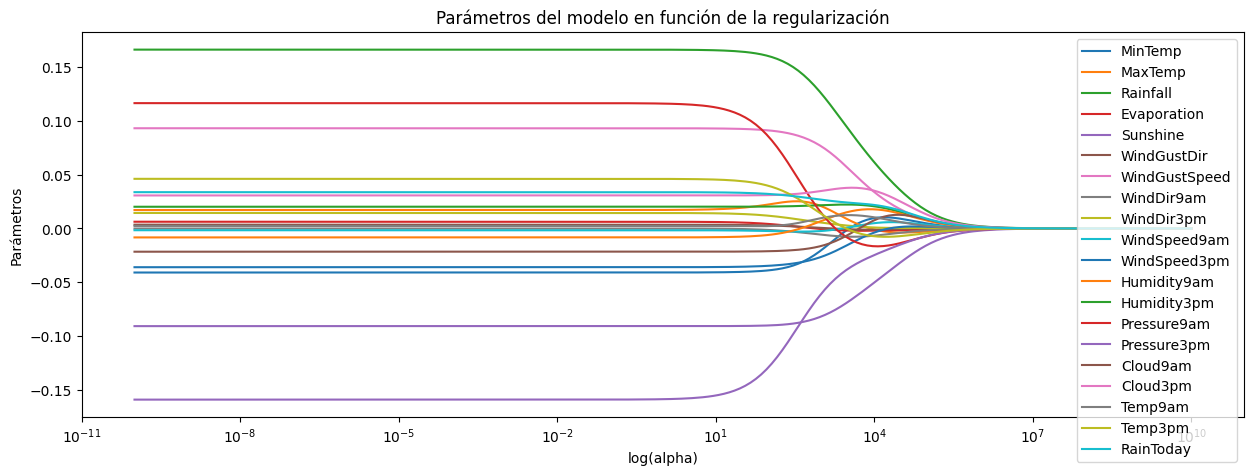

In [218]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

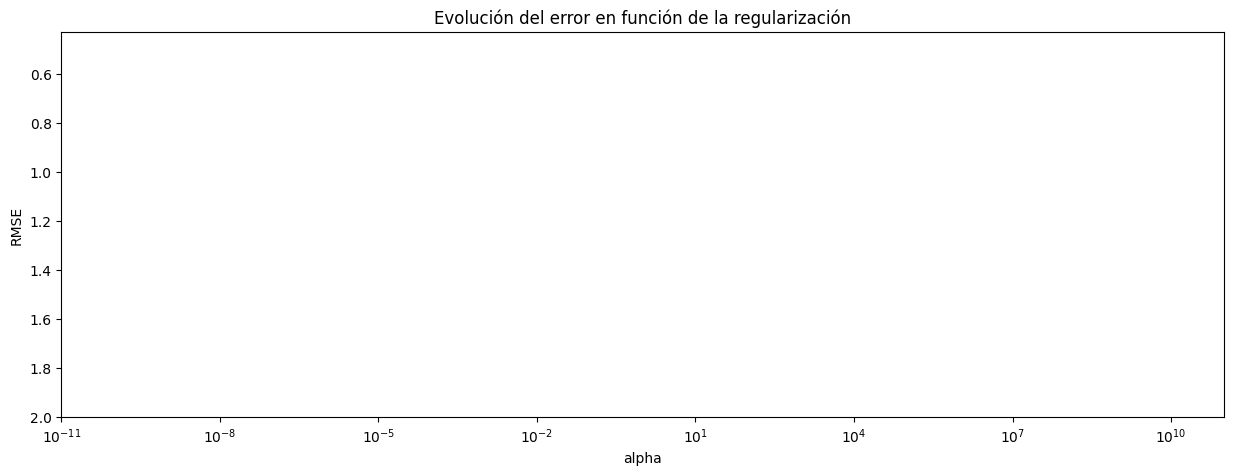

In [219]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [220]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 14.314589375234815


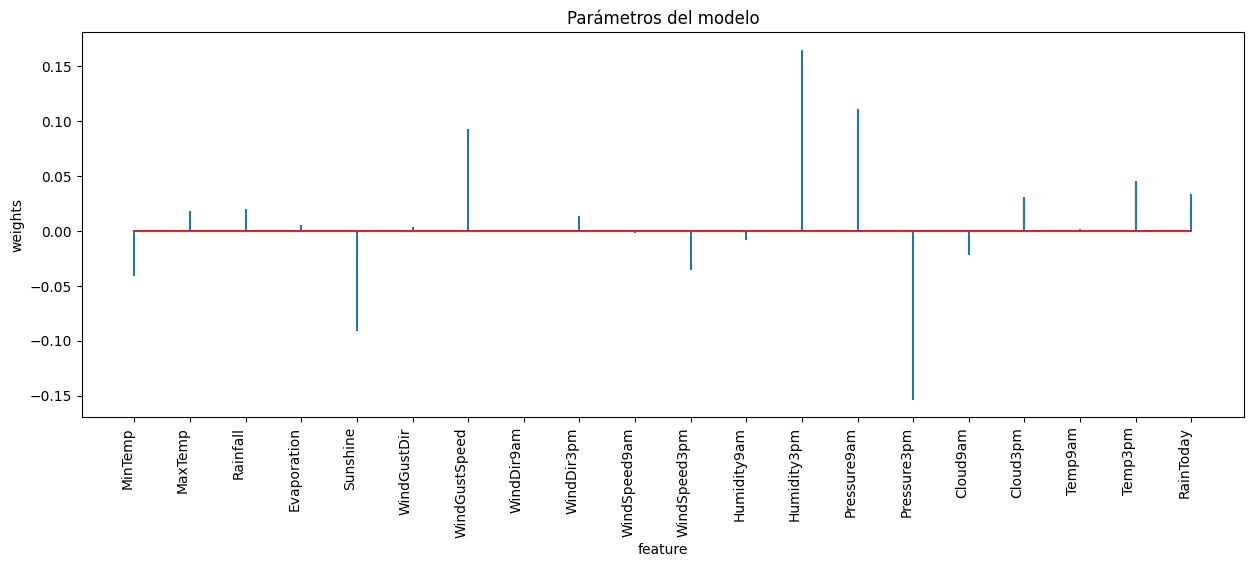

In [221]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [222]:
# Error de test del modelo

rmse_ridge = mean_squared_error(Y_test,
                predictions,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")



El error (rmse) de test es: 0.3478826041744809


## Lasso Regression


In [223]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, Y_train)


# realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.30958752076396023
MSE: 0.12101335915352618
RMSE: 0.3478697445216042
MAE: 0.26646345444826636
MAPE: inf


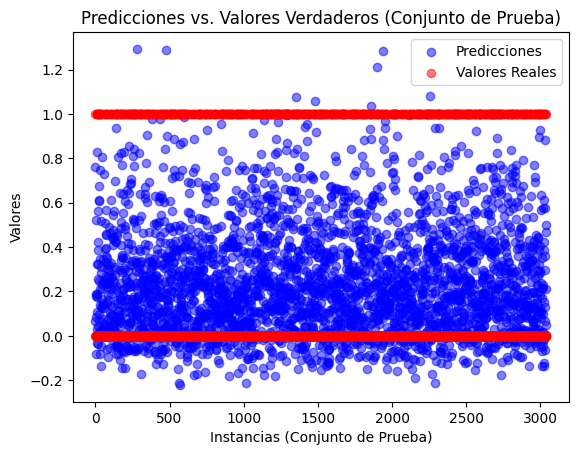

In [224]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

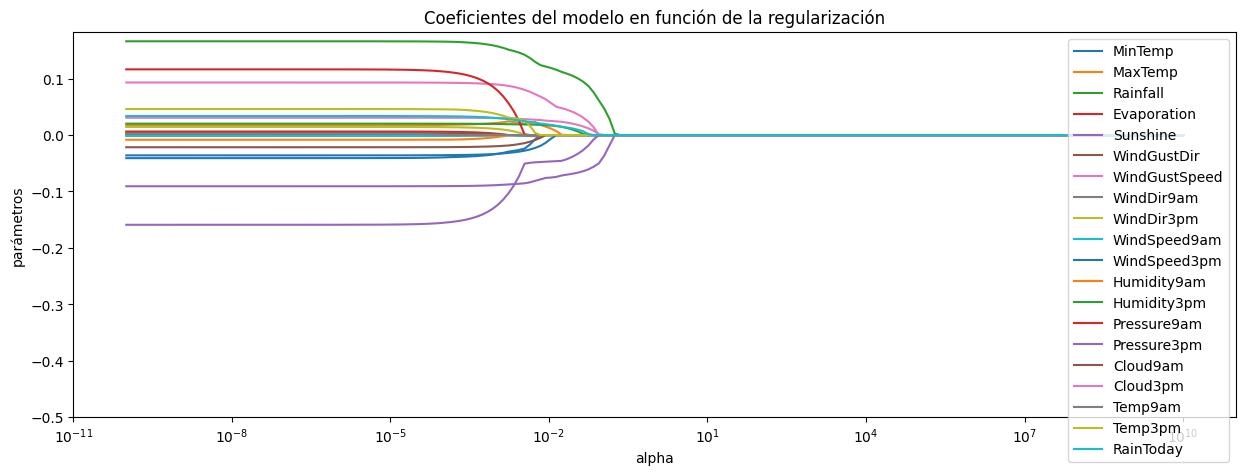

In [225]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

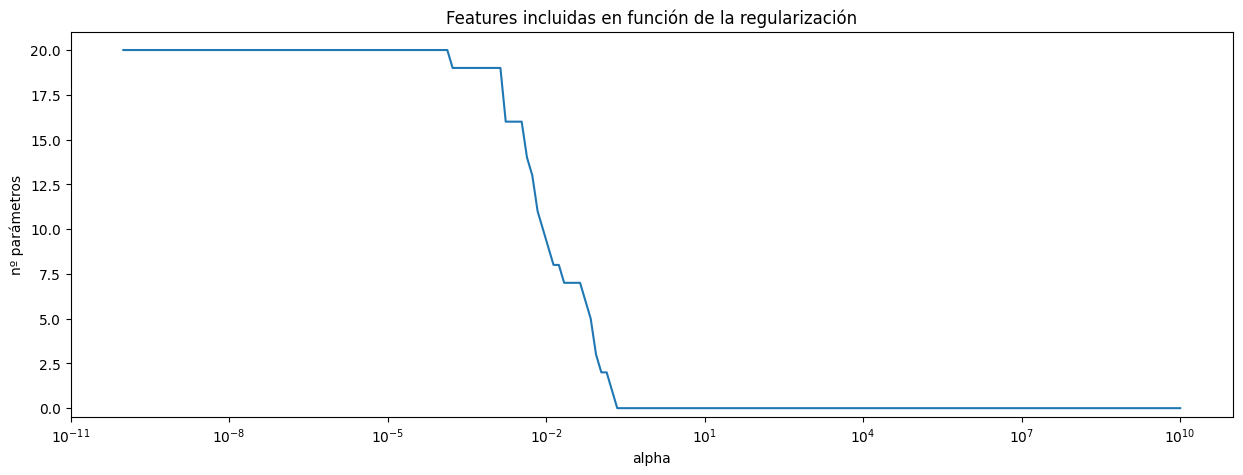

In [226]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

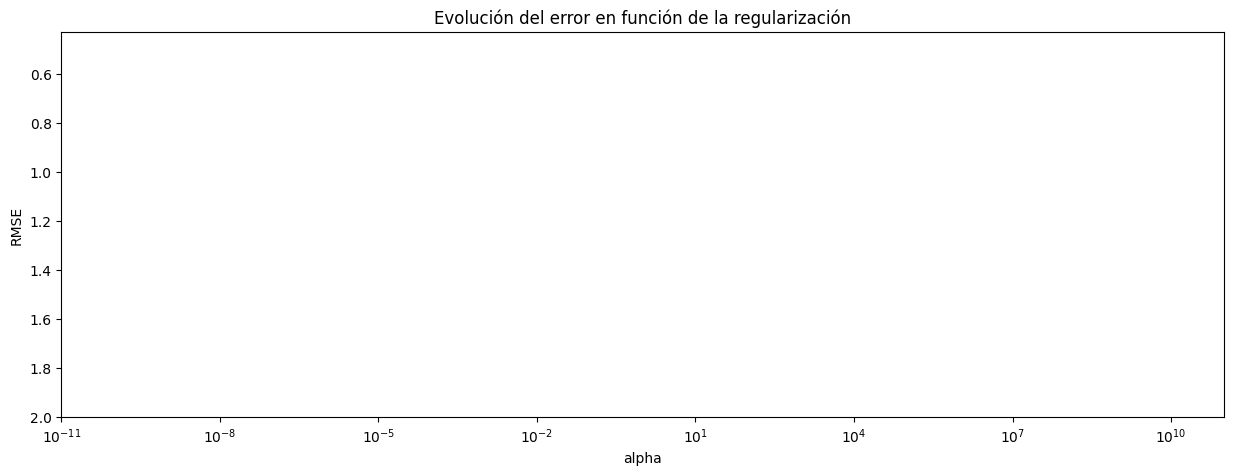

In [227]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [228]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.00017027691722259014


In [229]:
# Error de test del modelo

rmse_lasso = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 0.3478697445216042


## ElasticNet

In [230]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, Y_train)

# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

mod = modelo.steps[1][1]

R2 Score: 0.30960392324157304
MSE: 0.12101048417809618
RMSE: 0.34786561223854273
MAE: 0.2664772207084606
MAPE: inf


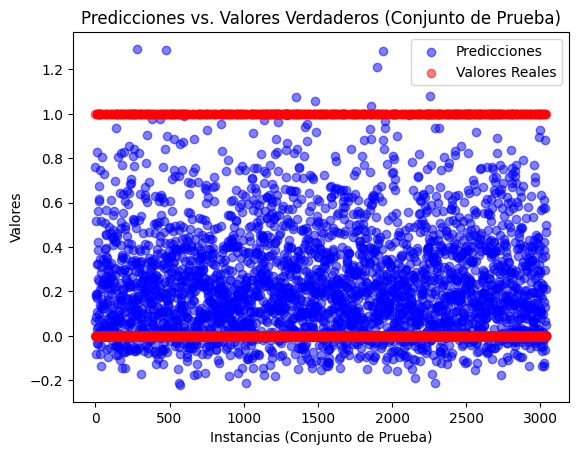

In [231]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

In [232]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio   mod.alphas_    mse_cv   rmse_cv
936       0.90  2.146141e-04  0.124183  0.352396
1337      0.99  1.702769e-04  0.124183  0.352396
735       0.70  2.704960e-04  0.124183  0.352396
1137      0.95  1.702769e-04  0.124183  0.352396
1136      0.95  2.146141e-04  0.124183  0.352396
...        ...           ...       ...       ...
600       0.70  1.000000e+10  0.180234  0.424539
503       0.50  4.448783e-01  0.180234  0.424539
502       0.50  5.607170e-01  0.180234  0.424539
605       0.70  3.144035e+09  0.180234  0.424539
699       0.70  1.122668e+00  0.180234  0.424539

[1400 rows x 4 columns]

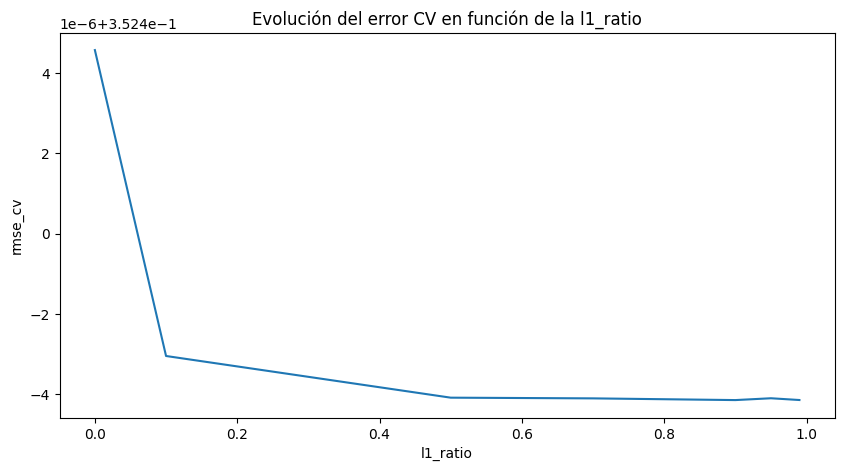

In [233]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

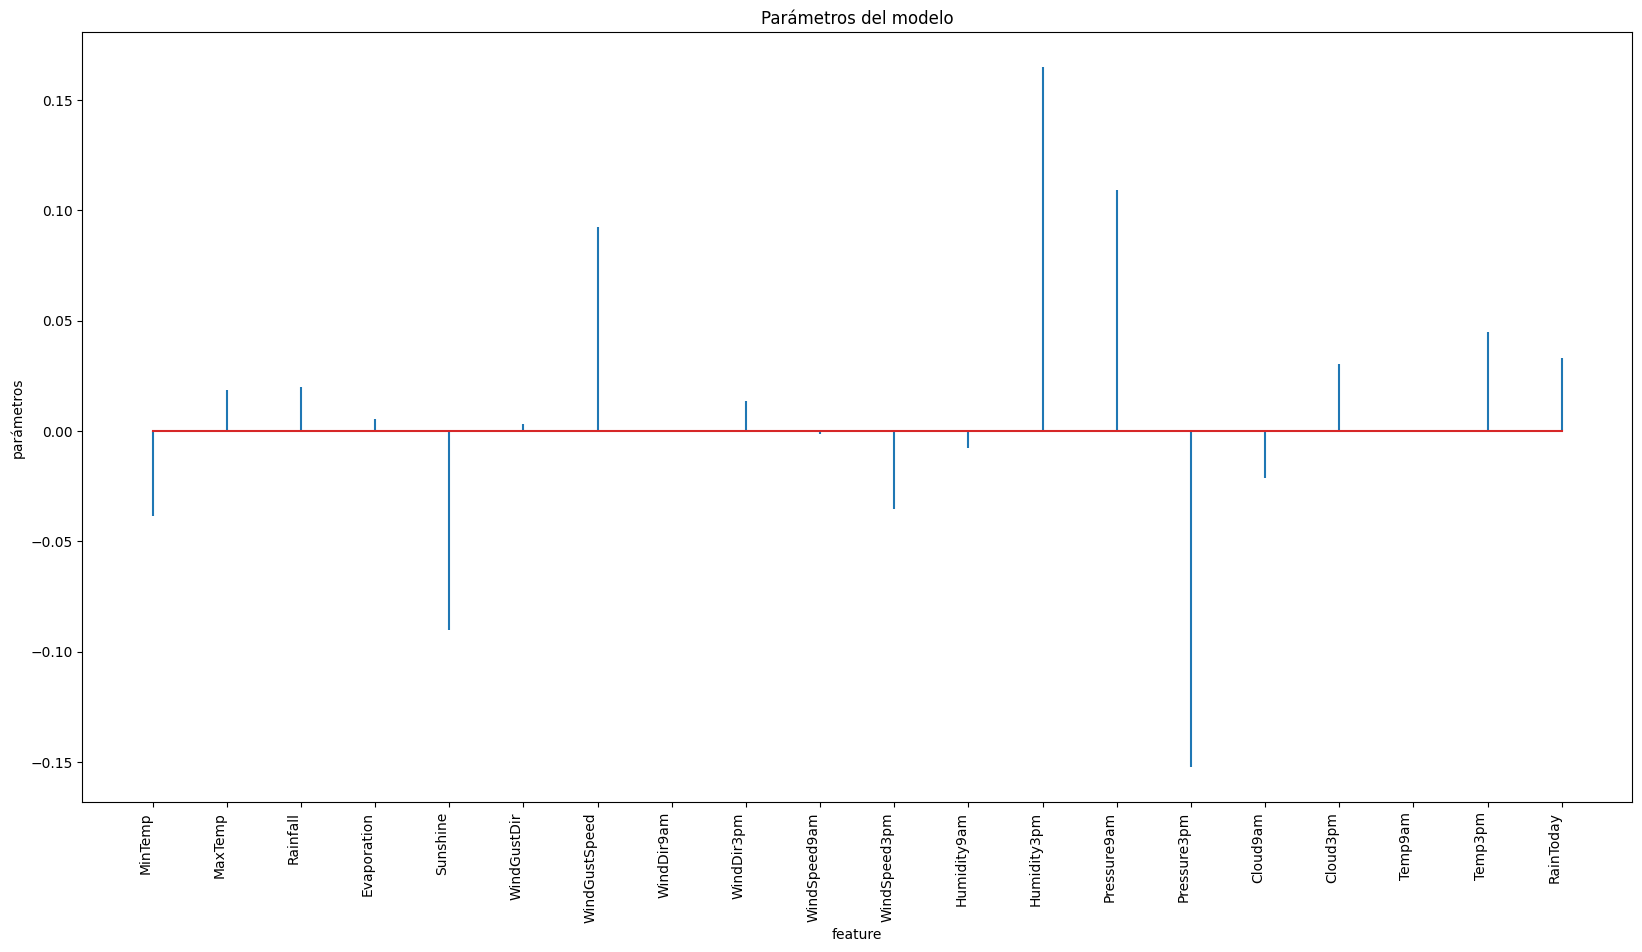

In [234]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [235]:
# Error de test del modelo

rmse_elastic = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.34786561223854273


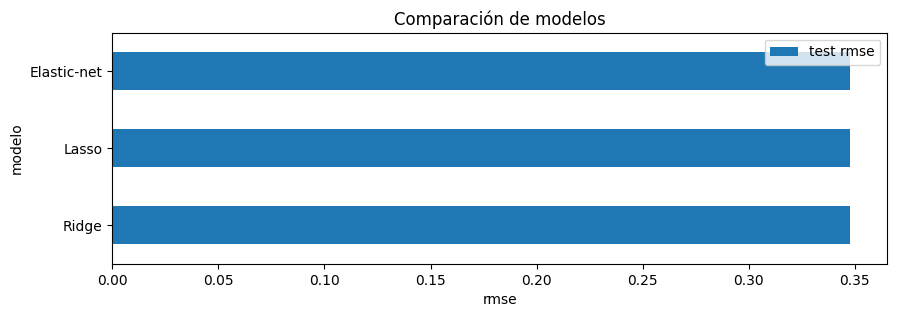

In [236]:
# Comparacion entre modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [ rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [237]:
df_comparacion.head()

modelo  test rmse
0        Ridge   0.347883
1        Lasso   0.347870
2  Elastic-net   0.347866

#Regresion logistica

## Sin balance

In [238]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))


Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2351
           1       0.72      0.50      0.59       689

    accuracy                           0.84      3040
   macro avg       0.79      0.72      0.75      3040
weighted avg       0.83      0.84      0.83      3040

[[2219  132]
 [ 346  343]]


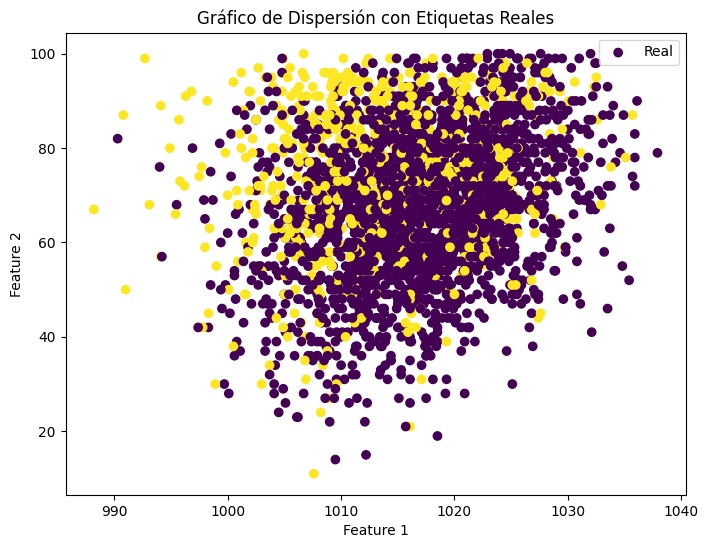

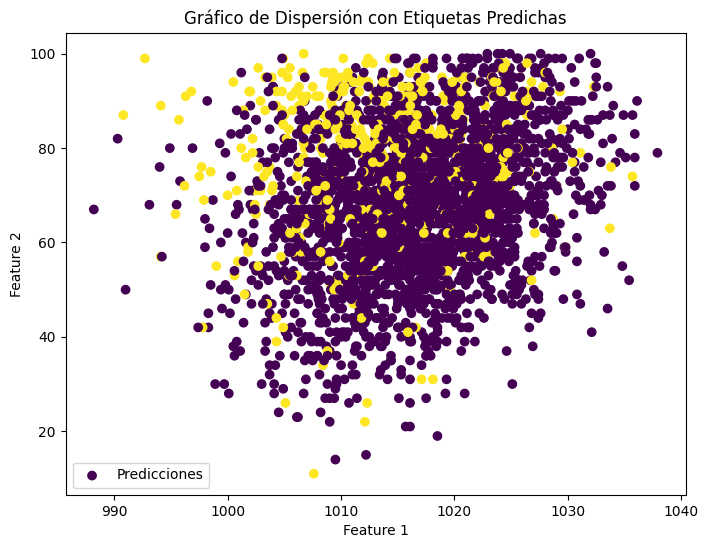

In [239]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

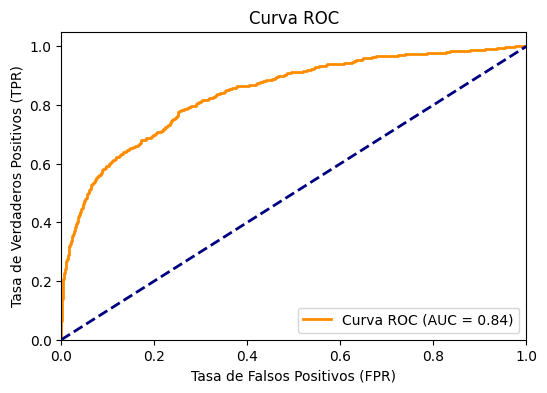

In [240]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Probando distintos balances

### Balance en el modelo

In [10]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

ValueError: ignored

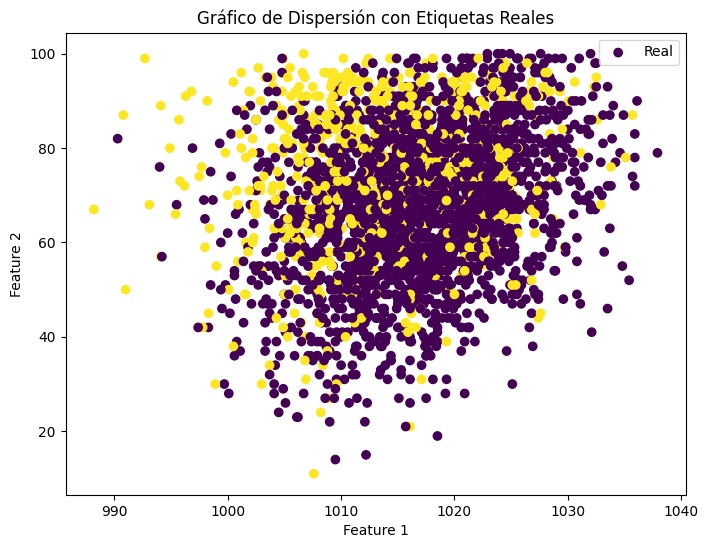

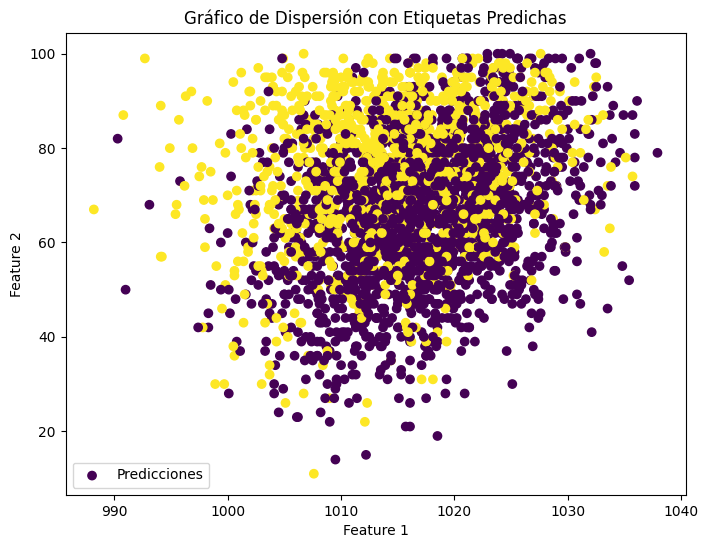

In [242]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

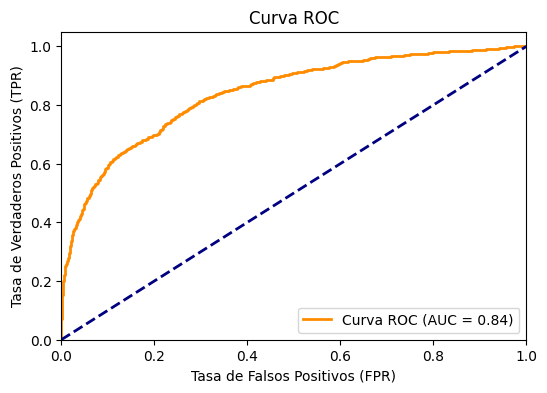

In [243]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance SMOTE

In [1]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, Y_train_resampled)
Y_pred = logistic_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))



NameError: ignored

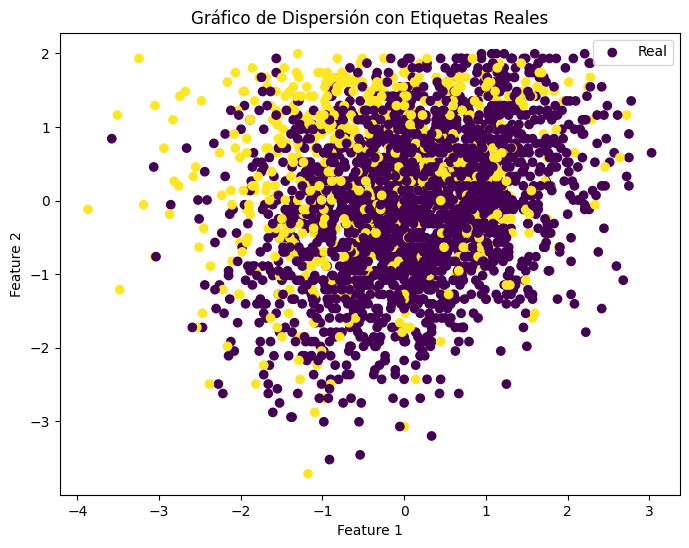

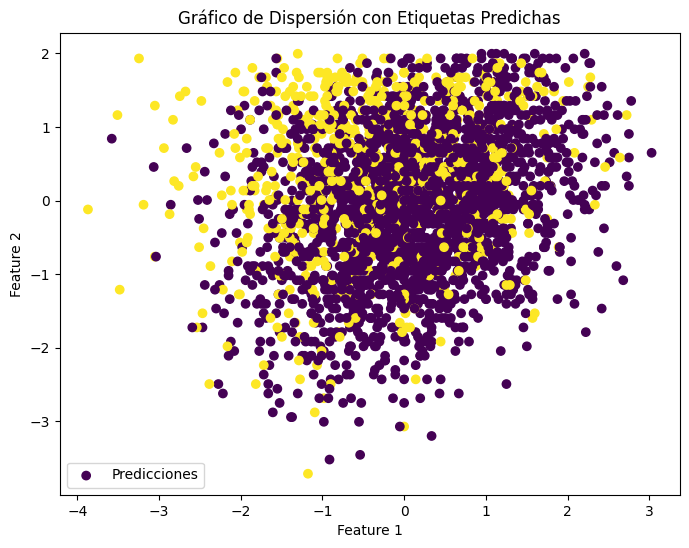

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

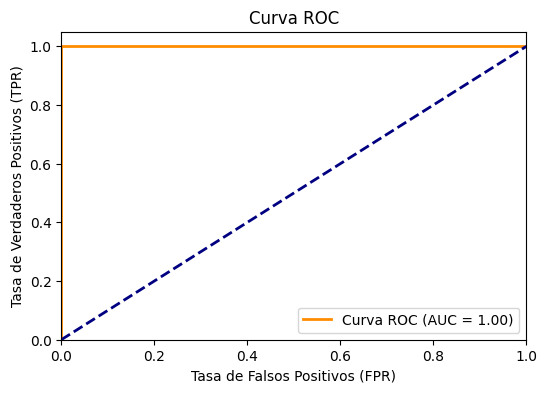

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance oversampler

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    df_test['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X_train, Y_train)

logistic_model1 = LogisticRegression(random_state=42)
logistic_model1.fit(X_resampled, Y_resampled)
Y_pred = logistic_model1.predict(X_test)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00       689

    accuracy                           1.00      3040
   macro avg       1.00      1.00      1.00      3040
weighted avg       1.00      1.00      1.00      3040

[[2351    0]
 [   0  689]]


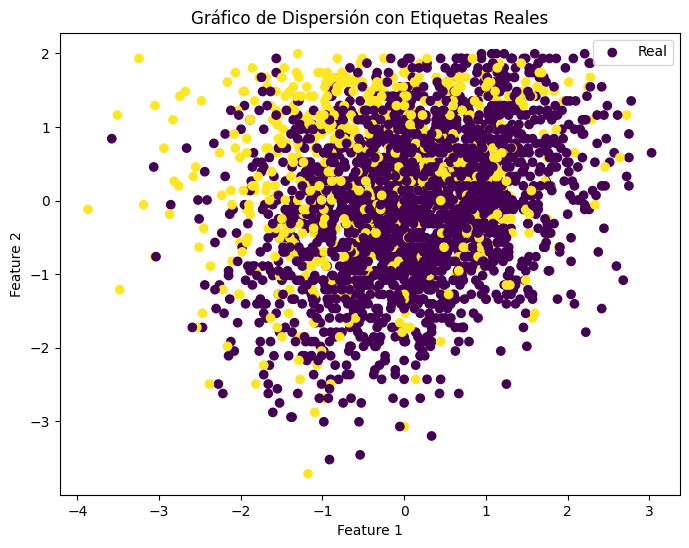

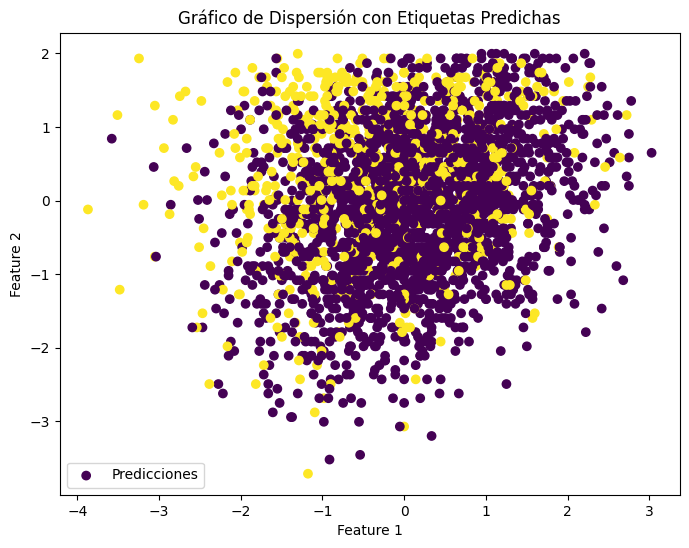

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

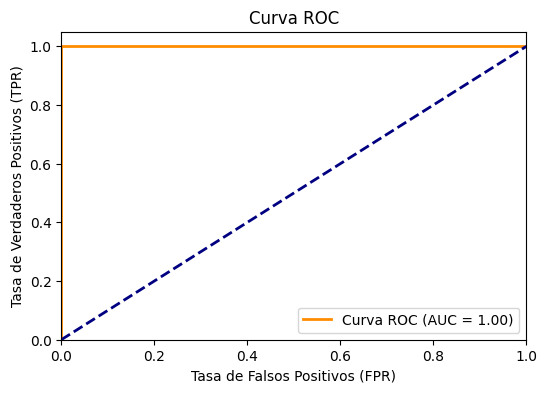

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### NOTA
La diferencia entre los distintos metodos de balance de clases es muy baja

##Explicabilidad

In [ ]:
feature_names=df_regresion.columns.values

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

y_pred = logistic_model.predict_proba(X_test_scaled)
y_ajuste_train = logistic_model.predict(X_train_scaled)

# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)
shap_values.shape

explainer.expected_value


3.023467432521082

####Local

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled[0])

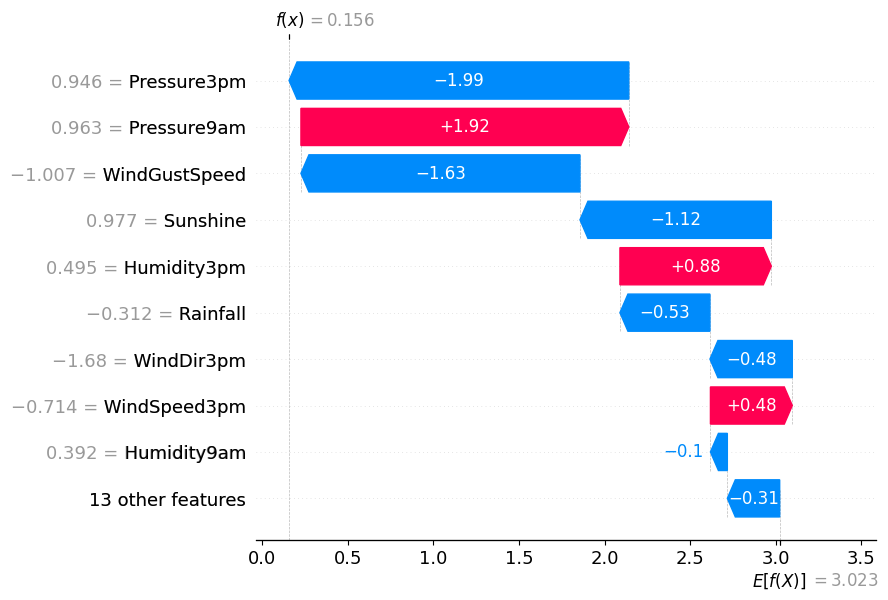

In [ ]:
shap.plots.waterfall(explanation[0])

###Gobal

In [ ]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)

In [ ]:
shap.plots.bar(explanation)

In [ ]:
shap.plots.beeswarm(explanation)

# PARTE 3

##Regresión

In [ ]:
df_categorica.columns
x = np.array(df_regresion['Sunshine'])
y = np.array(df_categorica['RainfallTomorrow'])
print(len(y), len(x))
print(len(df_regresion['Sunshine']))

15199 15199
15199


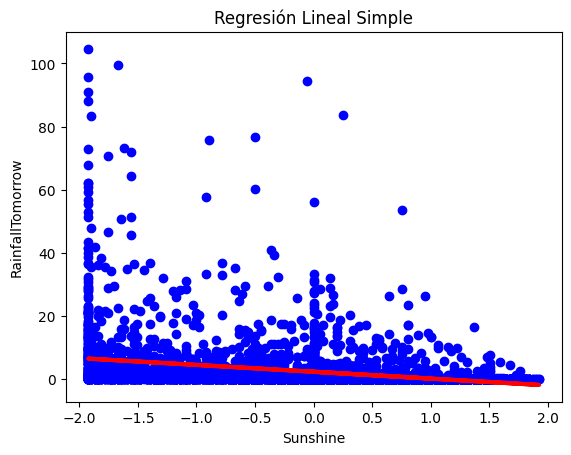

Error cuadrático medio en entrenamiento: 47.98702295555537
Error cuadrático medio en predicciones: 53.890473154448244
Error absoluto medio en predicciones: 3.3034487032294475
Intercept: [2.31693319]
Coeficientes: [[-2.16577882]]
R2: 0.08484286882000747


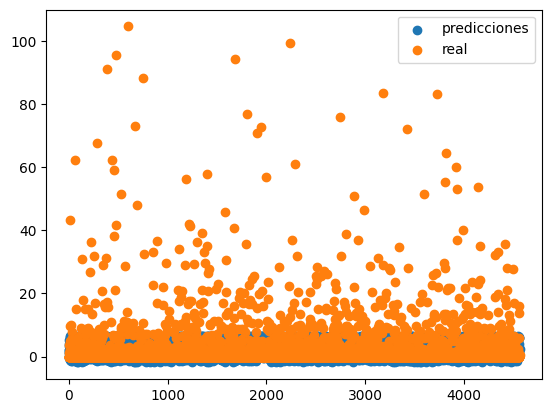

In [ ]:

# Extraer los valores de Sunshine y RainfallTomorrow
x = np.array(df_regresion['Sunshine']).reshape(-1, 1)
y = np.array(df_categorica['RainfallTomorrow']).reshape(-1, 1)

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=12)

# Crea y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)


# Visualiza los resultados
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predictions_test, color='red', linewidth=3)
plt.xlabel('Sunshine')
plt.ylabel('RainfallTomorrow')
plt.title('Regresión Lineal Simple')
plt.show()




# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()

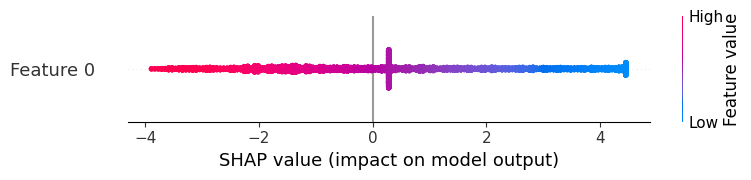

In [ ]:
explainer = shap.Explainer(model, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Mostrar el resumen de SHAP
shap.summary_plot(shap_values, X_test)

## Clasificacion

Accuracy: 0.7259868421052632
Confusion Matrix:
 [[1746  605]
 [ 228  461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      2351
           1       0.43      0.67      0.53       689

    accuracy                           0.73      3040
   macro avg       0.66      0.71      0.67      3040
weighted avg       0.78      0.73      0.74      3040



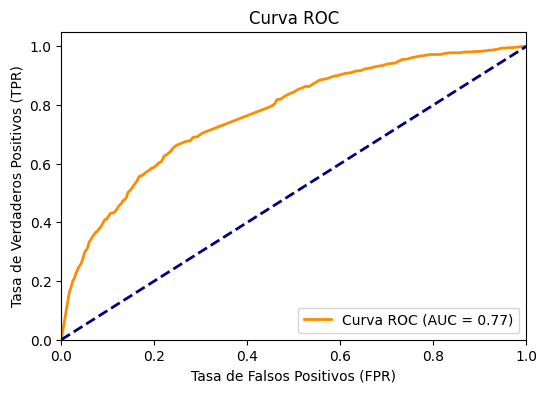

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba

X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion['Sunshine'].values.reshape(-1, 1),
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, Y_train.ravel())  # Usar ravel() para evitar un warning y garantizar que sea un array unidimensional

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(Y_test, y_pred)  # Usar Y_test en lugar de y_test
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Obtengo las probabilidades de predicción del modelo
Y_probs = model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Redes neuronales

##Red Neuronal para clasificacion

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X = df_test.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)  # Características
Y = df_test['RainTomorrow']  # Etiquetas


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a valores numéricos (0, 1, 2, ...)
Y_train_numeric = Y_train.astype('category').cat.codes
Y_test_numeric = Y_test.astype('category').cat.codes

# Convertir las etiquetas a formato categórico one-hot
num_classes = len(df_categorica['RainTomorrow'].unique())
Y_train_categorical = to_categorical(Y_train_numeric, num_classes=num_classes)
Y_test_categorical = to_categorical(Y_test_numeric, num_classes=num_classes)

# Modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida con el número correcto de clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, Y_train_categorical, epochs=5, batch_size=32, validation_data=(X_test_scaled, Y_test_categorical))


Epoch 1/5
262/262 [==============================] - 2s 4ms/step - loss: 0.4164 - accuracy: 0.8089 - val_loss: 0.3789 - val_accuracy: 0.8313
Epoch 2/5
262/262 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8365 - val_loss: 0.3761 - val_accuracy: 0.8290
Epoch 3/5
262/262 [==============================] - 1s 5ms/step - loss: 0.3649 - accuracy: 0.8399 - val_loss: 0.3724 - val_accuracy: 0.8280
Epoch 4/5
262/262 [==============================] - 1s 5ms/step - loss: 0.3589 - accuracy: 0.8433 - val_loss: 0.3724 - val_accuracy: 0.8313
Epoch 5/5
262/262 [==============================] - 1s 5ms/step - loss: 0.3545 - accuracy: 0.8443 - val_loss: 0.3744 - val_accuracy: 0.8352


In [ ]:
# Obtener las probabilidades de predicción en el conjunto de prueba
probabilities = model.predict(X_test_scaled)

# Obtener las clases resultantes (índice del valor máximo en cada fila)
predictions = probabilities.argmax(axis=-1)

# Calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test_numeric, predictions)
precision = precision_score(Y_test_numeric, predictions, average='weighted')
recall = recall_score(Y_test_numeric, predictions, average='weighted')
f1 = f1_score(Y_test_numeric, predictions, average='weighted')
r2 = r2_score(Y_test_categorical, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f"Coef (R²): {r2}")

66/66 [==============================] - 0s 2ms/step
Accuracy: 0.8351648351648352
Precision: 0.824837752106532
Recall: 0.8351648351648352
F1-score: 0.8227940758667428
Coef (R²): 0.34048079481704147


### Buscar mejores hiperparametros y graficar metricas del mejor modelo

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico one-hot
num_classes = len(set(Y))  # Asumiendo que Y contiene etiquetas categóricas
Y_train_categorical = to_categorical(Y_train, num_classes=num_classes)
Y_test_categorical = to_categorical(Y_test, num_classes=num_classes)

# Función objetivo para Optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 32, 128)

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for i in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_scaled, Y_train_categorical, epochs=10, batch_size=32, verbose=0)

    score = model.evaluate(X_test_scaled, Y_test_categorical, verbose=0)
    return score[1]  # Devuelve la precisión del modelo como la métrica objetivo

# Crea un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Imprime los mejores hiperparámetros encontrados
print('Mejor combinación de hiperparámetros:')
print(study.best_params)


[I 2023-12-08 23:31:00,845] A new study created in memory with name: no-name-3ff6d28b-2470-4044-9920-1aff99fb8ee8
[I 2023-12-08 23:31:12,058] Trial 0 finished with value: 0.8332536816596985 and parameters: {'num_layers': 3, 'num_neurons': 58}. Best is trial 0 with value: 0.8332536816596985.
[I 2023-12-08 23:31:20,025] Trial 1 finished with value: 0.8332536816596985 and parameters: {'num_layers': 2, 'num_neurons': 100}. Best is trial 0 with value: 0.8332536816596985.
[I 2023-12-08 23:31:28,901] Trial 2 finished with value: 0.8299092054367065 and parameters: {'num_layers': 2, 'num_neurons': 58}. Best is trial 0 with value: 0.8332536816596985.
[I 2023-12-08 23:31:40,111] Trial 3 finished with value: 0.8308647871017456 and parameters: {'num_layers': 3, 'num_neurons': 73}. Best is trial 0 with value: 0.8332536816596985.
[I 2023-12-08 23:31:48,418] Trial 4 finished with value: 0.8289536833763123 and parameters: {'num_layers': 1, 'num_neurons': 45}. Best is trial 0 with value: 0.8332536816596

Mejor combinación de hiperparámetros:
{'num_layers': 3, 'num_neurons': 58}


###Explicabilidad del modelo

Matriz 1: (100, 20)
Matriz 2: (100, 20)


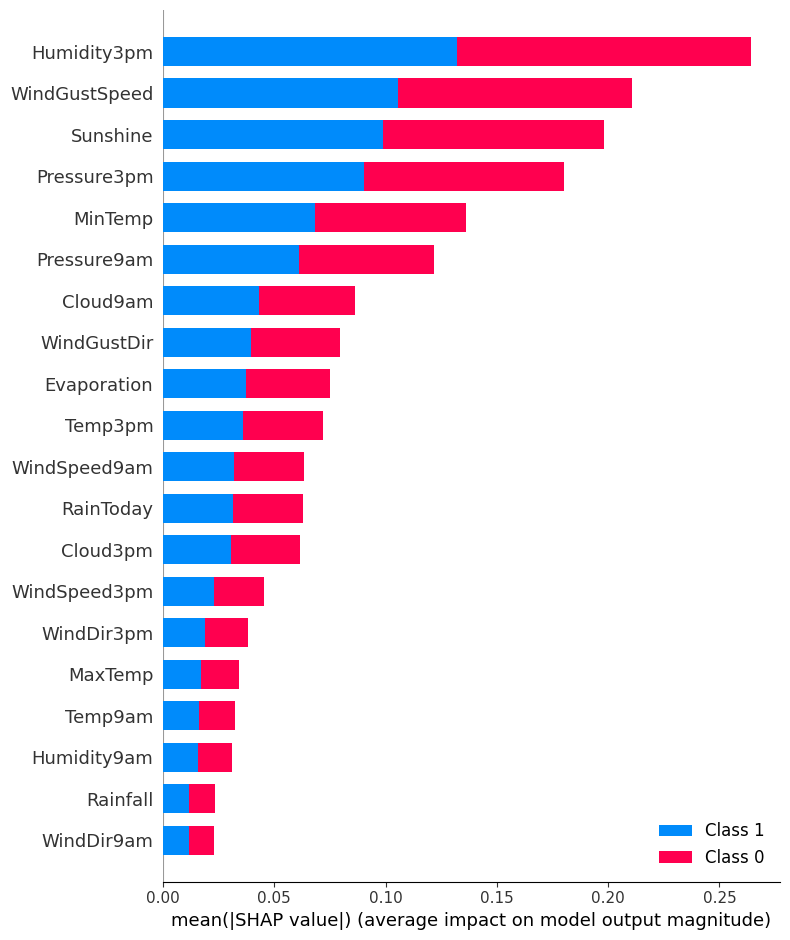

In [ ]:
# Crear un objeto explainer SHAP con tu modelo secuencial
explainer = shap.DeepExplainer(model, X_train_scaled[:100])  # Puedes ajustar el tamaño de muestra si es necesario

# Calcular los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled[:100])  # Ajusta el tamaño del conjunto de prueba según sea necesario
# Imprimir la forma de cada matriz en la lista de valores SHAP
for i, sv in enumerate(shap_values):
    print(f"Matriz {i + 1}: {sv.shape}")

explainer.expected_value  # Esto te dará el valor esperado del modelo
# Crear el gráfico de resumen
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=df_regresion.columns)
plt.show()


##Red Neuronal para Regresion

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X = df_test.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)  # Características
Y = df_test['RainfallTomorrow']  # Etiquetas


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a valores numéricos (0, 1, 2, ...)
Y_train_numeric = Y_train.astype('category').cat.codes
Y_test_numeric = Y_test.astype('category').cat.codes


# Modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida con el número correcto de clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, Y_train_categorical, epochs=5, batch_size=32, validation_data=(X_test_scaled, Y_test_categorical))

Epoch 1/5
262/262 [==============================] - 3s 7ms/step - loss: 0.4027 - accuracy: 0.8249 - val_loss: 0.3791 - val_accuracy: 0.8323
Epoch 2/5
262/262 [==============================] - 2s 8ms/step - loss: 0.3695 - accuracy: 0.8414 - val_loss: 0.3721 - val_accuracy: 0.8323
Epoch 3/5
262/262 [==============================] - 2s 6ms/step - loss: 0.3616 - accuracy: 0.8433 - val_loss: 0.3697 - val_accuracy: 0.8376
Epoch 4/5
262/262 [==============================] - 1s 4ms/step - loss: 0.3577 - accuracy: 0.8448 - val_loss: 0.3703 - val_accuracy: 0.8333
Epoch 5/5
262/262 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 0.8463 - val_loss: 0.3682 - val_accuracy: 0.8337


In [ ]:
# Obtener las probabilidades de predicción en el conjunto de prueba
probabilities = model.predict(X_test_scaled)

# Obtener las clases resultantes (índice del valor máximo en cada fila)
predictions = probabilities.argmax(axis=-1)

# Calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test_numeric, predictions)
precision = precision_score(Y_test_numeric, predictions, average='weighted')
recall = recall_score(Y_test_numeric, predictions, average='weighted')
f1 = f1_score(Y_test_numeric, predictions, average='weighted')
r2 = r2_score(Y_test_categorical, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f"Coef (R²): {r2}")

66/66 [==============================] - 0s 2ms/step
Accuracy: 0.6153846153846154
Precision: 0.45879230466896
Recall: 0.6153846153846154
F1-score: 0.5250325754063624
Coef (R²): 0.35206893890333596


### Buscar mejores hiperparametros y graficar metricas del mejor modelo

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico one-hot
num_classes = len(set(Y))  # Asumiendo que Y contiene etiquetas categóricas
Y_train_categorical = to_categorical(Y_train, num_classes=num_classes)
Y_test_categorical = to_categorical(Y_test, num_classes=num_classes)

# Función objetivo para Optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 32, 128)

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for i in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_scaled, Y_train_categorical, epochs=10, batch_size=32, verbose=0)

    score = model.evaluate(X_test_scaled, Y_test_categorical, verbose=0)
    return score[1]  # Devuelve la precisión del modelo como la métrica objetivo

# Crea un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Imprime los mejores hiperparámetros encontrados
print('Mejor combinación de hiperparámetros:')
print(study.best_params)

[I 2023-12-08 23:26:35,314] A new study created in memory with name: no-name-b14fd157-1433-43e8-811e-6e656145d37a
[I 2023-12-08 23:26:57,049] Trial 0 finished with value: 0.7362637519836426 and parameters: {'num_layers': 2, 'num_neurons': 100}. Best is trial 0 with value: 0.7362637519836426.
[I 2023-12-08 23:27:11,160] Trial 1 finished with value: 0.7353081703186035 and parameters: {'num_layers': 2, 'num_neurons': 59}. Best is trial 0 with value: 0.7362637519836426.
[I 2023-12-08 23:27:33,811] Trial 2 finished with value: 0.735785961151123 and parameters: {'num_layers': 3, 'num_neurons': 90}. Best is trial 0 with value: 0.7362637519836426.
[I 2023-12-08 23:27:45,968] Trial 3 finished with value: 0.7362637519836426 and parameters: {'num_layers': 2, 'num_neurons': 87}. Best is trial 0 with value: 0.7362637519836426.
[I 2023-12-08 23:27:56,722] Trial 4 finished with value: 0.7372192740440369 and parameters: {'num_layers': 3, 'num_neurons': 123}. Best is trial 4 with value: 0.7372192740440

Mejor combinación de hiperparámetros:
{'num_layers': 2, 'num_neurons': 59}


###Explicabilidad del modelo

Matriz 1: (100, 20)
Matriz 2: (100, 20)


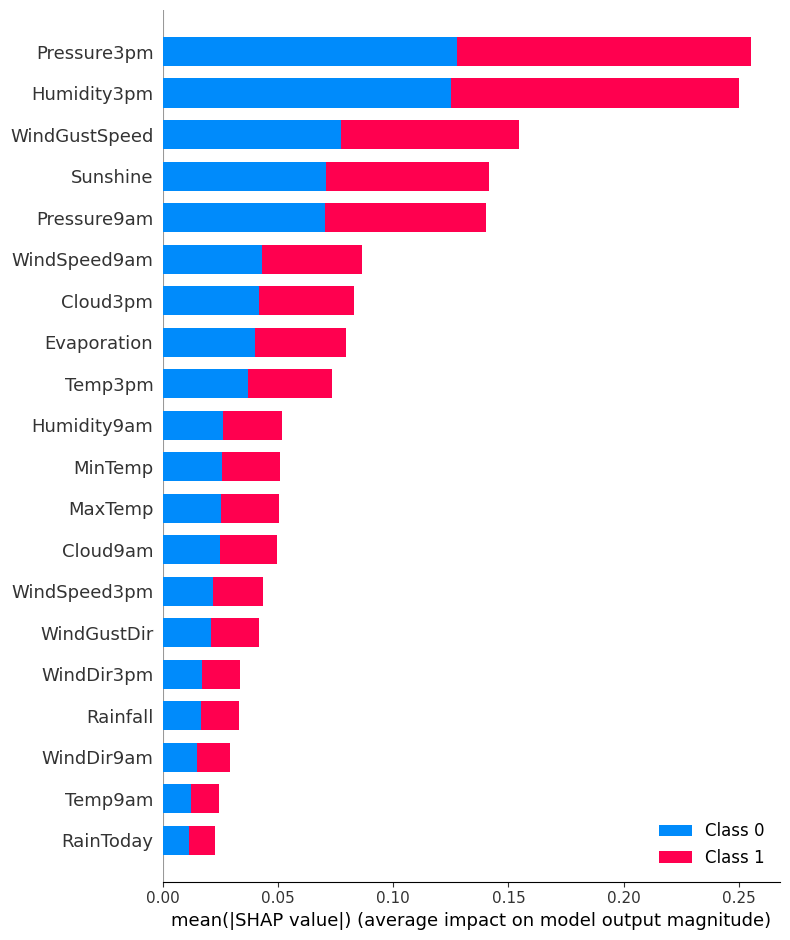

In [ ]:
# Crear un objeto explainer SHAP con tu modelo secuencial
explainer = shap.DeepExplainer(model, X_train_scaled[:100])  # Puedes ajustar el tamaño de muestra si es necesario

# Calcular los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled[:100])  # Ajusta el tamaño del conjunto de prueba según sea necesario
# Imprimir la forma de cada matriz en la lista de valores SHAP
for i, sv in enumerate(shap_values):
    print(f"Matriz {i + 1}: {sv.shape}")

explainer.expected_value  # Esto te dará el valor esperado del modelo
# Crear el gráfico de resumen
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=df_regresion.columns)
plt.show()

#MLops

##app_clima.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets
import joblib

df = pd.read_csv("weatherAUS.csv", delimiter=",")

def FunctionTransformer(df):#funcion para actualizar dataframe
  dff=df.copy()
  localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

  dff= dff[dff['Location'].isin(localidades)]
  dff = dff.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

  dff = df.drop('Location', axis=1)
  def rellenar(t):
      for columna in t.columns:

          # Verifica si la columna tiene datos faltantes
          if t[columna].isnull().any():

              # Si es numérica y continua, rellena con el promedio
              if pd.api.types.is_numeric_dtype(t[columna]) and not pd.api.types.is_integer_dtype(t[columna]):
                  t[columna].fillna(t[columna].mean(), inplace=True)

              # Si es numérica y discreta, rellena con la moda
              elif pd.api.types.is_numeric_dtype(t[columna]):
                  t[columna].fillna(t[columna].mode()[0], inplace=True)

            # Si es categórica, rellena con la moda
              else:
                  t[columna].fillna(t[columna].mode()[0], inplace=True)

      return t
  dff = rellenar(dff)
  dff =  dff.reset_index(drop = True)
  columnas_categoricas = dff.select_dtypes(exclude='number').columns
  le = LabelEncoder()
  for categorica in columnas_categoricas:
    dff[categorica] = le.fit_transform(dff[categorica])
  dff = dff.replace([np.inf, -np.inf], 0)
  dff.drop('Unnamed: 0', axis=1, inplace=True)
  dff.drop('Date', axis=1, inplace=True)


  return dff
dff=FunctionTransformer(df)


X = dff.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)
y = dff['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # esto simplemente imputa por la media.
    ('scaler', StandardScaler()),  # se realiza una estandarización.
    ('model', LogisticRegression())  # se entrena un modelo de regresión lineal.
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'clima_pipeline.joblib')

##app_clima.py

In [ ]:
import streamlit as st
import numpy as np
import joblib

st.title('Predicción del clima')

pipeline_entrenado = joblib.load('clima_pipeline.joblib')

#variables
MinTemp = st.slider('MinTemp', -4.8, 29.7, 13.18)
MaxTemp = st.slider('MaxTemp', 6.6, 47.3, 23.75)
Rainfall = st.slider('Rainfall', 0.0, 371.0, 2.7)
Evaporation = st.slider('Evaporation', 0.0, 145.0, 5.62)
Sunshine = st.slider('Sunshine', 0.0, 14.10, 7.58)
WindGustDir = st.slider('WindGustDir', 0.0, 15.0, 7.28)
WindGustSpeed = st.slider('WindGustSpeed', 7.0, 135.0, 38.92)
WindDir9am = st.slider('WindDir9am', 0.0, 15.0, 8.2)
WindSpeed3pm = st.slider('WindSpeed3pm', 0.0, 15.0, 7.12)
WindSpeed9am = st.slider('WindSpeed9am', 0.0, 130.0, 13.15)
WindSpeed3pm = st.slider('WindSpeed3pm', 4.0, 8.0, 5.0)
Humidity9am = st.slider('Humidity9am', 2.0, 4.5, 3.0)
Humidity3pm = st.slider('Humidity3pm', 1.0, 100.0, 52.6)
Pressure9am = st.slider('Pressure9am', 980.5, 1039.9, 1018.29)
Pressure3pm = st.slider('Pressure3pm', 979.0, 1037.8, 1015.75)
Cloud9am = st.slider('Cloud9am', 0.0, 9.0, 4.36)
Cloud3am = st.slider('Cloud3am', 0.0, 8.0, 4.44)
Temp9am = st.slider('Temp9am', 0.0, 37.7, 17.68)
Temp3pm = st.slider('Temp3pm', 6.0, 46.7, 22.28)
RainToday = st.slider('RainToday', 0.0, 1.0, 0.22)

# Agregar un botón para predecir
if st.button('Predict'):
    data_para_predecir = np.array([[MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3am,Temp9am,Temp3pm,RainToday]])#se usa array porque entra ese dato a la tuberia

    prediccion = pipeline_entrenado.predict(data_para_predecir)
    st.write('Predicción:', prediccion)

# Conclusión

Hemos recorrido y conocido la implemetación de herramientas de ML. Pudimos experimentar como se comportan las regresiones, como se pueden optimizar los algoritmos y como puede ser utilizada en producto final por el cliente.